<a href="https://colab.research.google.com/github/rebeccalizaverghese/IBM-Data-Science/blob/main/8_5_Data_Visualization_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Practice Assessment**
A.) Analyzing wildfire activities in Australia

B.) Creating Dashboards

In [1]:
# Installing necessary libraries
!pip install folium
!pip install packaging
!pip install pandas dash
!pip3 install httpx==0.20 dash plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.5/82.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 4.9 MB/s eta 0:00:00


In [2]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
from dash import no_update
import plotly.graph_objects as go
import plotly.express as px
import datetime as dt

**Dataset - Historical Wildfires dataset containing data on fire activities in Australia starting from 2005.**

In [3]:
# Import Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
df = pd.read_csv(url)
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [4]:
# Verify the column names and data types of each variables
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [5]:
df.dtypes

,0
Region,object
Date,object
Estimated_fire_area,float64
Mean_estimated_fire_brightness,float64
Mean_estimated_fire_radiative_power,float64
Mean_confidence,float64
Std_confidence,float64
Var_confidence,float64
Count,int64
Replaced,object


In [6]:
# Notice the type of 'Date' is object, let's convert it to 'datatime' type and also let's extract 'Year' and 'Month' from date and include in the dataframe as separate columns
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df[['Year', 'Month']].head()

,Year,Month
0,2005,1
1,2005,1
2,2005,1
3,2005,1
4,2005,1


In [7]:
df.dtypes

,0
Region,object
Date,object
Estimated_fire_area,float64
Mean_estimated_fire_brightness,float64
Mean_estimated_fire_radiative_power,float64
Mean_confidence,float64
Std_confidence,float64
Var_confidence,float64
Count,int64
Replaced,object


#### Practice Tasks:
A.) Analyzing wildfire activities in Australia

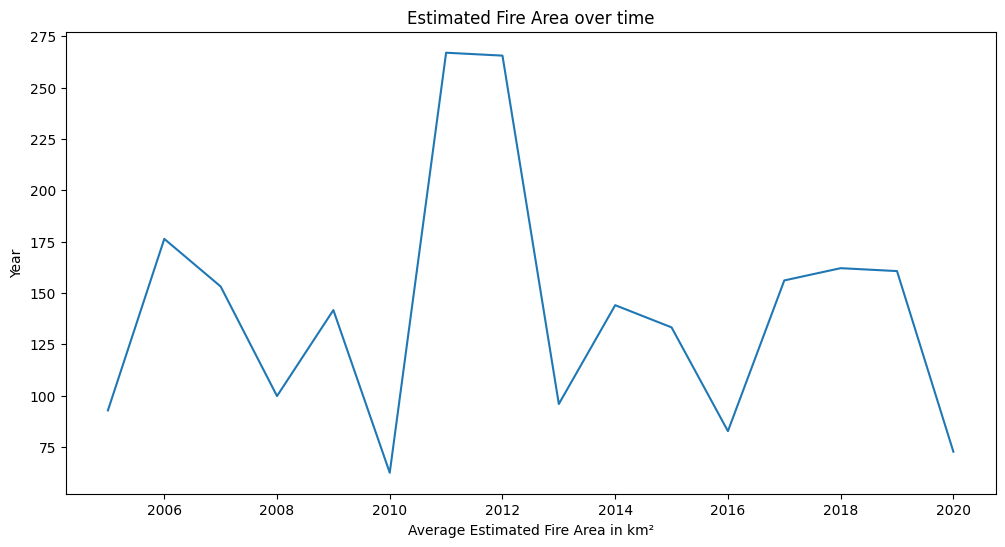

In [ ]:
# TASK 1.1: Let's try to understand the change in average estimated fire area over time
## (use pandas to plot line graph)
df_new = df.groupby('Year')['Estimated_fire_area'].mean()
plt.figure(figsize=(12,6))
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Average Estimated Fire Area in km²')
plt.ylabel('Year')
plt.title('Estimated Fire Area over time')
plt.show()

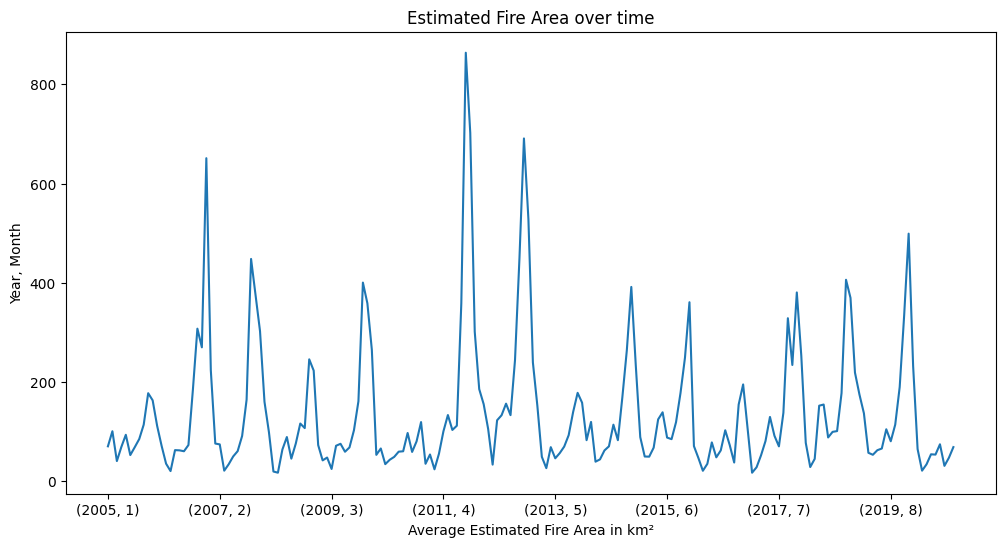

In [ ]:
# TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.
df_new = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean()
plt.figure(figsize=(12,6))
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Average Estimated Fire Area in km²')
plt.ylabel('Year, Month')
plt.title('Estimated Fire Area over time')
plt.show()

Observation: This plot represents that the estimated fire area was on its peak after 2011, April and before 2012. You can verify on google/news, this was the time of maximum wildfire hit in Austrailia

In [ ]:
# TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions
## Use the functionality of seaborn to develop a barplot

### To know the unique regions mentioned in dataset
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

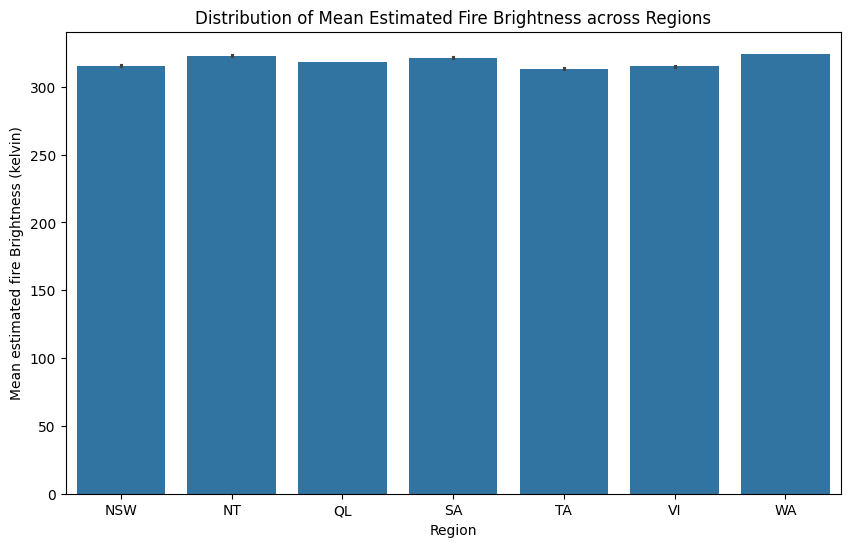

In [ ]:
# plot barplot using seaborn
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean estimated fire Brightness (kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

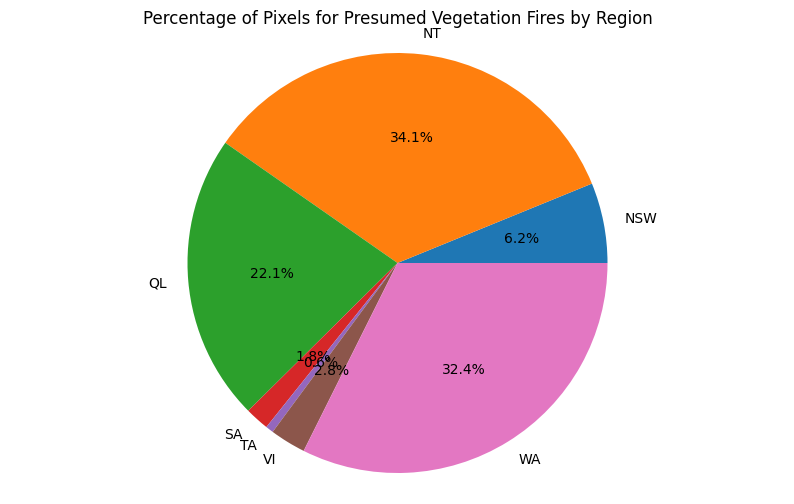

In [ ]:
# TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions
# develop a pie chart for this
## Group data by region and sum up count
plt.figure(figsize=(10,6))
region_counts = df.groupby('Region')['Count'].sum()
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()

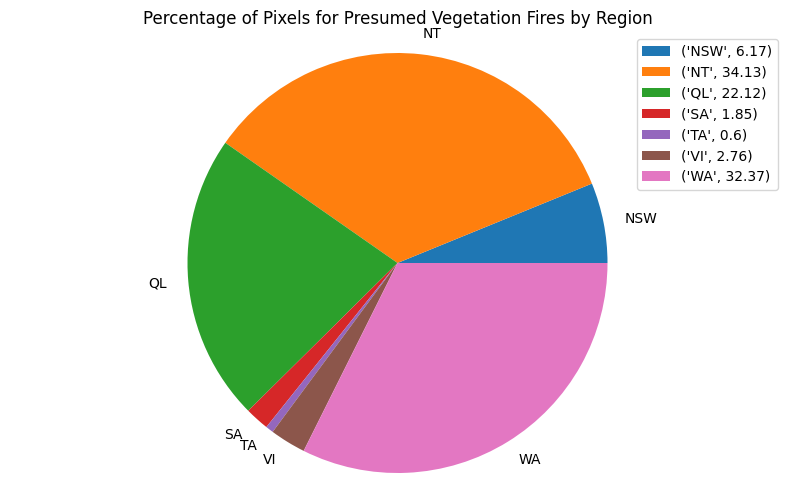

In [ ]:
# TASK 1.5: See the percentage on the pie is not looking so good as it is overlaped for Region SA, TA, VI
## remove the autopct from pie function and pass the following to plt.legend() after plt.title()
### [(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)]
plt.figure(figsize=(10,6))
region_counts = df.groupby('Region')['Count'].sum()
plt.pie(region_counts, labels=region_counts.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.legend([(i, round(k/region_counts.sum()*100,2)) for i, k in zip(region_counts.index, region_counts)])
plt.show()

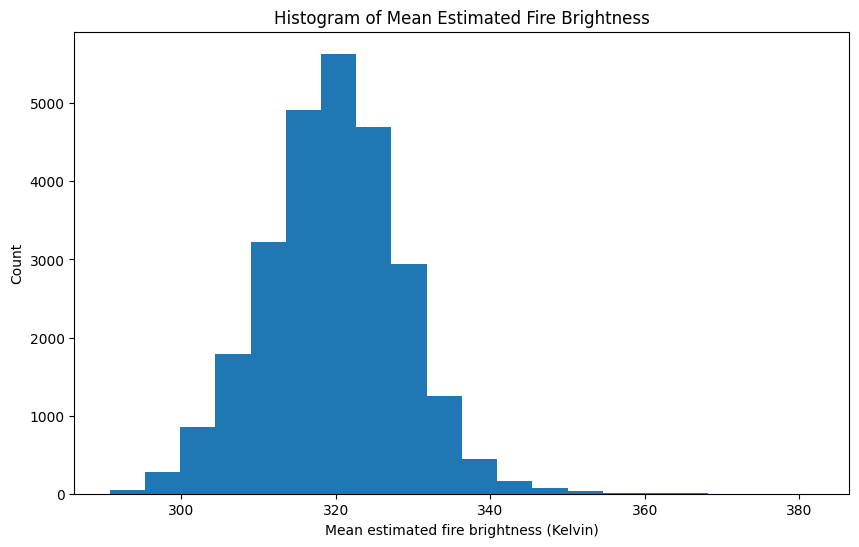

In [ ]:
# TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness
# Use Matplotlib to create the histogram
plt.figure(figsize=(10,6))
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean estimated fire brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()


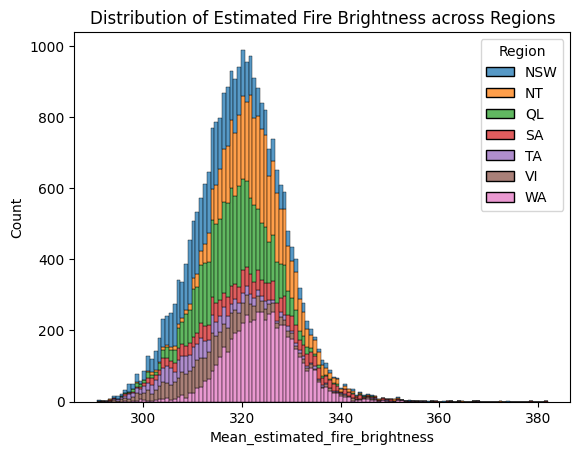

In [ ]:
# TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and pass region as hue
sns.histplot(data=df, x='Mean_estimated_fire_brightness',
             hue='Region', # Adding hue='Region' differentiates the distribution across regions
             multiple='stack', # Setting multiple='stack' to stack the histograms for different regions
             )
plt.title('Distribution of Estimated Fire Brightness across Regions')
plt.show()

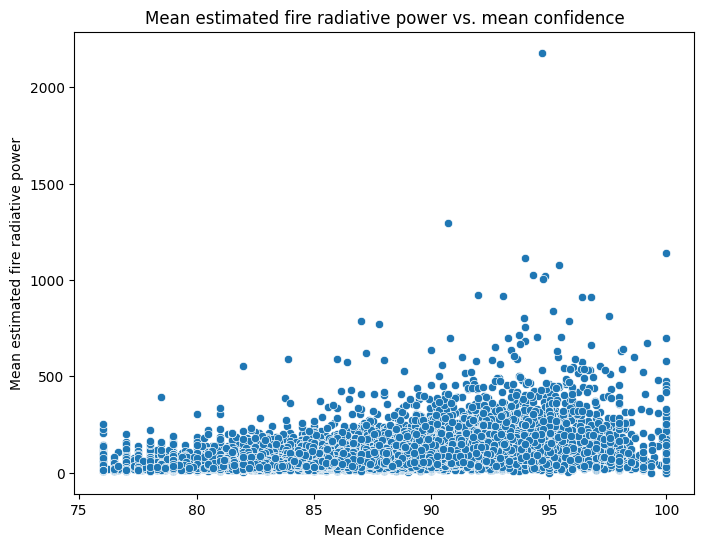

In [ ]:
# TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level
# use seaborn to create scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Confidence')
plt.ylabel('Mean estimated fire radiative power')
plt.title('Mean estimated fire radiative power vs. mean confidence')
plt.show()

In [ ]:
# TASK 1.9: Let's mark these seven regions on the Map of Australia using Folium
## createda dataframe for you containing the regions, their latitudes and longitudes
reg_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'],
            'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411],
            'Lng':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}

reg=pd.DataFrame(reg_data)
reg


,region,Lat,Lng
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [ ]:
### Instantiate a feature group
aus_reg = folium.map.FeatureGroup()
### create a folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

### loop trhough the regions and add the feature group
for lat, lng, lab in zip(reg.Lat, reg.Lng, reg.Lat):
  aus_reg.add_child(folium.features.CircleMarker([lat, lng],
                                                 popup=lab,
                                                 radius=5, # define how big you want the circle markers to be
                                                 color='red',
                                                 fill=True,
                                                 fill_color='blue',
                                                 fill_opacity=0.6))

# add incidents to the mapp
Aus_map.add_child(aus_reg)

B.) Creating Dashboards

In [19]:
import pandas as pd
import dash
from dash import html, dcc
from dash.dependencies import Input, Output, State
import plotly.graph_objects as go
import plotly.express as px
from dash import no_update
import datetime as dt

#Create app

app = dash.Dash(__name__)

# Clear the layout and do not display exception till callback gets executed
app.config.suppress_callback_exceptions = True

# Read the wildfire data into pandas dataframe
df =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv')

#Extract year and month from the date column

df['Month'] = pd.to_datetime(df['Date']).dt.month_name() #used for the names of the months
df['Year'] = pd.to_datetime(df['Date']).dt.year

#Layout Section of Dash
## Task 2.1 Add the Title to the Dashboard
app.layout = html.Div(children=[html.H1('Australia Wildfire Dashboard',
                                      style={'textAligh':'center',
                                             'color':'#503D36',
                                             'font-size':26}),

## TASK 2.2: Add the radio items and a dropdown right below the first inner division
#outer division starts
                              html.Div([
                              #First inner divsion for adding dropdown helper text for Selected Drive wheels
                              html.Div([html.H2('Select Region: ', style={'margin-right':'2em'}),
                                        #Radio items to select the region
                                        dcc.RadioItems(['NSW', 'Ql', 'SA', 'TA', 'VI', 'WA'], 'NSW', id='region', inline=True)]),
                              html.Div([html.H2('Select Year:', style={'margin-right':'2em'}),
                                        dcc.Dropdown(df.Year.unique(), value=2005, id='year')]), #notice the use of unique() from pandas to fetch the values of year from the dataframe for dropdow

#Second Inner division for adding 2 inner divisions for 2 output graphs
## TASK 2.3: Add two empty divisions for output inside the next inner division.
            html.Div([
                              html.Div([ ], id='plot1'),
                              html.Div([ ], id='plot2')],
                      style={'display':'flex'}),
                              #outer division ends
                              ])
                              # layout ends
])

## #TASK 2.4: Add the Ouput and input components inside the app.callback decorator.
# Place to add @app.callback Decorator
@app.callback([Output(component_id='plot1', component_property='children'),
               Output(component_id='plot2', component_property='children')],
               [Input(component_id='region', component_property='value'),
                Input(component_id='year', component_property='value')])

## TASK 2.5: Add the callback function.
#Place to define the callback function.
def reg_year_display(input_region,input_year):
    #data
   region_data = df[df['Region'] == input_region]
   y_r_data = region_data[region_data['Year']==input_year]
    #Plot one - Monthly Average Estimated Fire Area
   est_data = y_r_data.groupby('Month')['Estimated_fire_area'].mean().reset_index()
   fig1 = px.pie(est_data, values='Estimated_fire_area', names='Month', title="{} : Monthly Average Estimated Fire Area in year {}".format(input_region,input_year))
     #Plot two - Monthly Average Count of Pixels for Presumed Vegetation Fires
   veg_data = y_r_data.groupby('Month')['Count'].mean().reset_index()
   fig2 = px.bar(veg_data, x='Month', y='Count', title='{} : Average Count of Pixels for Presumed Vegetation Fires in year {}'.format(input_region,input_year))
   return [dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig2) ]

if __name__ == '__main__':
  app.run_server()

<IPython.core.display.Javascript object>